<a href="https://colab.research.google.com/github/dbwilburn/BIOC5721/blob/main/Gas_Law_Simulation_AU24_Lecture_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIOC5721 - Physical Biochemistry I**
## Particle Simulator Visualizations for Lecture
DBW/RME 2024-08-29

To make best use of this notebook, Edit > Clear all outputs, then run desired cells sequentially

For example, this is a **markdown cell** where information can be written and formatted in various ways using different flags. They are useful for embedding different types of important textual data to accompany your source code.

Text can be **bolded**, _italicized_, and formatted to look like `code`, rendered as a $\frac{Latex}{equation}$, as well as other options. You can double click on this cell to see formatting procedures.

In [39]:
# Confirm libraries are installed on the system
!pip install numpy pandas scipy matplotlib

# Load libraries
import numpy as np, pandas as pd # Numerical and data frame libraries
import matplotlib.pyplot as plt # Plotting library
import scipy.stats as stats # General statistics package

import matplotlib.gridspec as gridspec # Extra matplotlib package for asymmetric graphs


In [3]:
#@title Particle Simulator Code (can ignore if you desire, but must click the > run arrow)

## Particle simulation classes

class Particle:
    def __init__(self, position, velocity, mass):
        self.position = np.array(position, dtype=float)
        self.velocity = np.array(velocity, dtype=float)
        self.mass = mass

    def move(self, dt):
        # Update position based on velocity
        self.position += self.velocity * dt


    def collide_with_wall(self, box_size):
        # Check for collisions with walls and reflect velocity
        collision = 0.0
        for i in range(len(self.position)):
            if self.position[i] <= 0 or self.position[i] >= box_size[i]:
                self.velocity[i] *= -1
                collision += np.abs(self.velocity[i]) * 2
                self.position[i] = np.clip(self.position[i], 0, box_size[i])
        return collision



class Particle_Simulator:
    def __init__(self, size, n_particles, velocity_scalar=1.0, mass=1.0):
        self.size = np.array(size, dtype=float)
        self.n_dim = len(self.size)
        if self.n_dim <= 2:
            self.area = 2*np.sum(self.size)
        elif self.n_dim == 3:
            self.area = 2*np.sum(self.size*np.roll(self.size,1))

        self.particles = [Particle(position=np.random.rand(self.n_dim) * size,
                                   velocity=np.random.normal(loc=0, scale=velocity_scalar, size=self.n_dim),
                                   mass=mass)
                          for _ in range(n_particles)] # Randomly initialize starting positions and velocities
        self.pressure = 0
        self.temperature = 0

    def update(self, dt):
        # Reset pressure for this time step
        self.pressure = 0
        total_kinetic_energy = 0

        for particle in self.particles:
            particle.move(dt)

            # Calculate kinetic energy: 1/2 * m * v^2
            kinetic_energy = 0.5 * particle.mass * np.sum(particle.velocity ** 2)
            total_kinetic_energy += kinetic_energy / 1.5

            # Calculate pressure contribution from wall collisions
            self.pressure += particle.collide_with_wall(self.size) / dt / self.area

        # Calculate temperature as proportional to average kinetic energy
        #self.temperature = total_kinetic_energy / (len(self.particles) * 1.5)
        self.temperature = total_kinetic_energy

    def simulate(self, final_time, dt=0.01, verbose=True): # Default dt = 10 ms
        # Prepare storage for positions, temperatures, and pressures
        positions_over_time = [[] for _ in range(len(self.particles))]
        temperatures = []
        pressures = []
        times = np.arange(dt, final_time+dt, dt) # dt to time in steps of dt
        for t in times:
            self.update(dt)
            temperatures.append(self.temperature)
            pressures.append(self.pressure)

            for i, particle in enumerate(self.particles):
                positions_over_time[i].append(particle.position.copy())
        if verbose:
            print('Simulation complete!')
        return times, positions_over_time, temperatures, pressures

Perform a series of simulations to illustrate different functionalities of the model

Compute a simple single simulation

In [15]:
## Simulation parameters
box_size = [10, 10]
n_particles = 500
velocity_scalar = 25.0
simulation_time = 10.0
dt = 0.01 # 1e-4 of the run time

sim = Particle_Simulator(size=box_size,
                         n_particles=n_particles,
                         velocity_scalar=velocity_scalar)

times, coordinates, temperatures, pressures = sim.simulate(simulation_time, dt=dt)


Simulation complete!


In [30]:
## Plot a reduced representation of the simulation for visual clarity

num_particles_to_plot = 500
time_steps_to_plot = 2
# Convert positions_over_time to a numpy array (time_steps, num_particles, 2)
trajectories = np.array(coordinates)

fig, ax = plt.subplots(figsize=(5,5), dpi=300)

# Plot the next n particles in gray
for i in range(num_particles_to_plot):
    color = '#cc4444' if i == num_particles_to_plot-1 else '#444444'
    alpha = 1.0 if i == num_particles_to_plot-1 else 0.3
    zorder = 10000 if i == num_particles_to_plot-1 else 1
    ax.scatter([trajectories[i, 0, 0]], [trajectories[i, 0, 1]],
               color=color, s=16, zorder=zorder)
    ax.plot(trajectories[i, :time_steps_to_plot, 0],
            trajectories[i, :time_steps_to_plot, 1],
            color=color, alpha=alpha)

# Plot the first particle in red
#ax.plot(trajectories[0, :, 0], trajectories[0, :, 1], color='#cc4444')

# Set limits and labels
ax.set_xlim(0, box_size[0])
ax.set_ylim(0, box_size[1])
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
fig.tight_layout()

In [29]:
## Plot a reduced representation of the simulation for visual clarity

num_particles_to_plot = 500
time_steps_to_plot = 11
# Convert positions_over_time to a numpy array (time_steps, num_particles, 2)
trajectories = np.array(coordinates)

fig, ax = plt.subplots(figsize=(5,5), dpi=300)

# Plot the next n particles in gray
for i in range(num_particles_to_plot):
    color = '#cc4444' if i == num_particles_to_plot-1 else '#444444'
    alpha = 1.0 if i == num_particles_to_plot-1 else 0.3
    zorder = 10000 if i == num_particles_to_plot-1 else 1
    ax.scatter([trajectories[i, 0, 0]], [trajectories[i, 0, 1]],
               color=color, s=16, zorder=zorder)
    ax.plot(trajectories[i, :time_steps_to_plot, 0],
            trajectories[i, :time_steps_to_plot, 1],
            color=color, alpha=alpha)

# Plot the first particle in red
#ax.plot(trajectories[0, :, 0], trajectories[0, :, 1], color='#cc4444')

# Set limits and labels
ax.set_xlim(0, box_size[0])
ax.set_ylim(0, box_size[1])
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
fig.tight_layout()

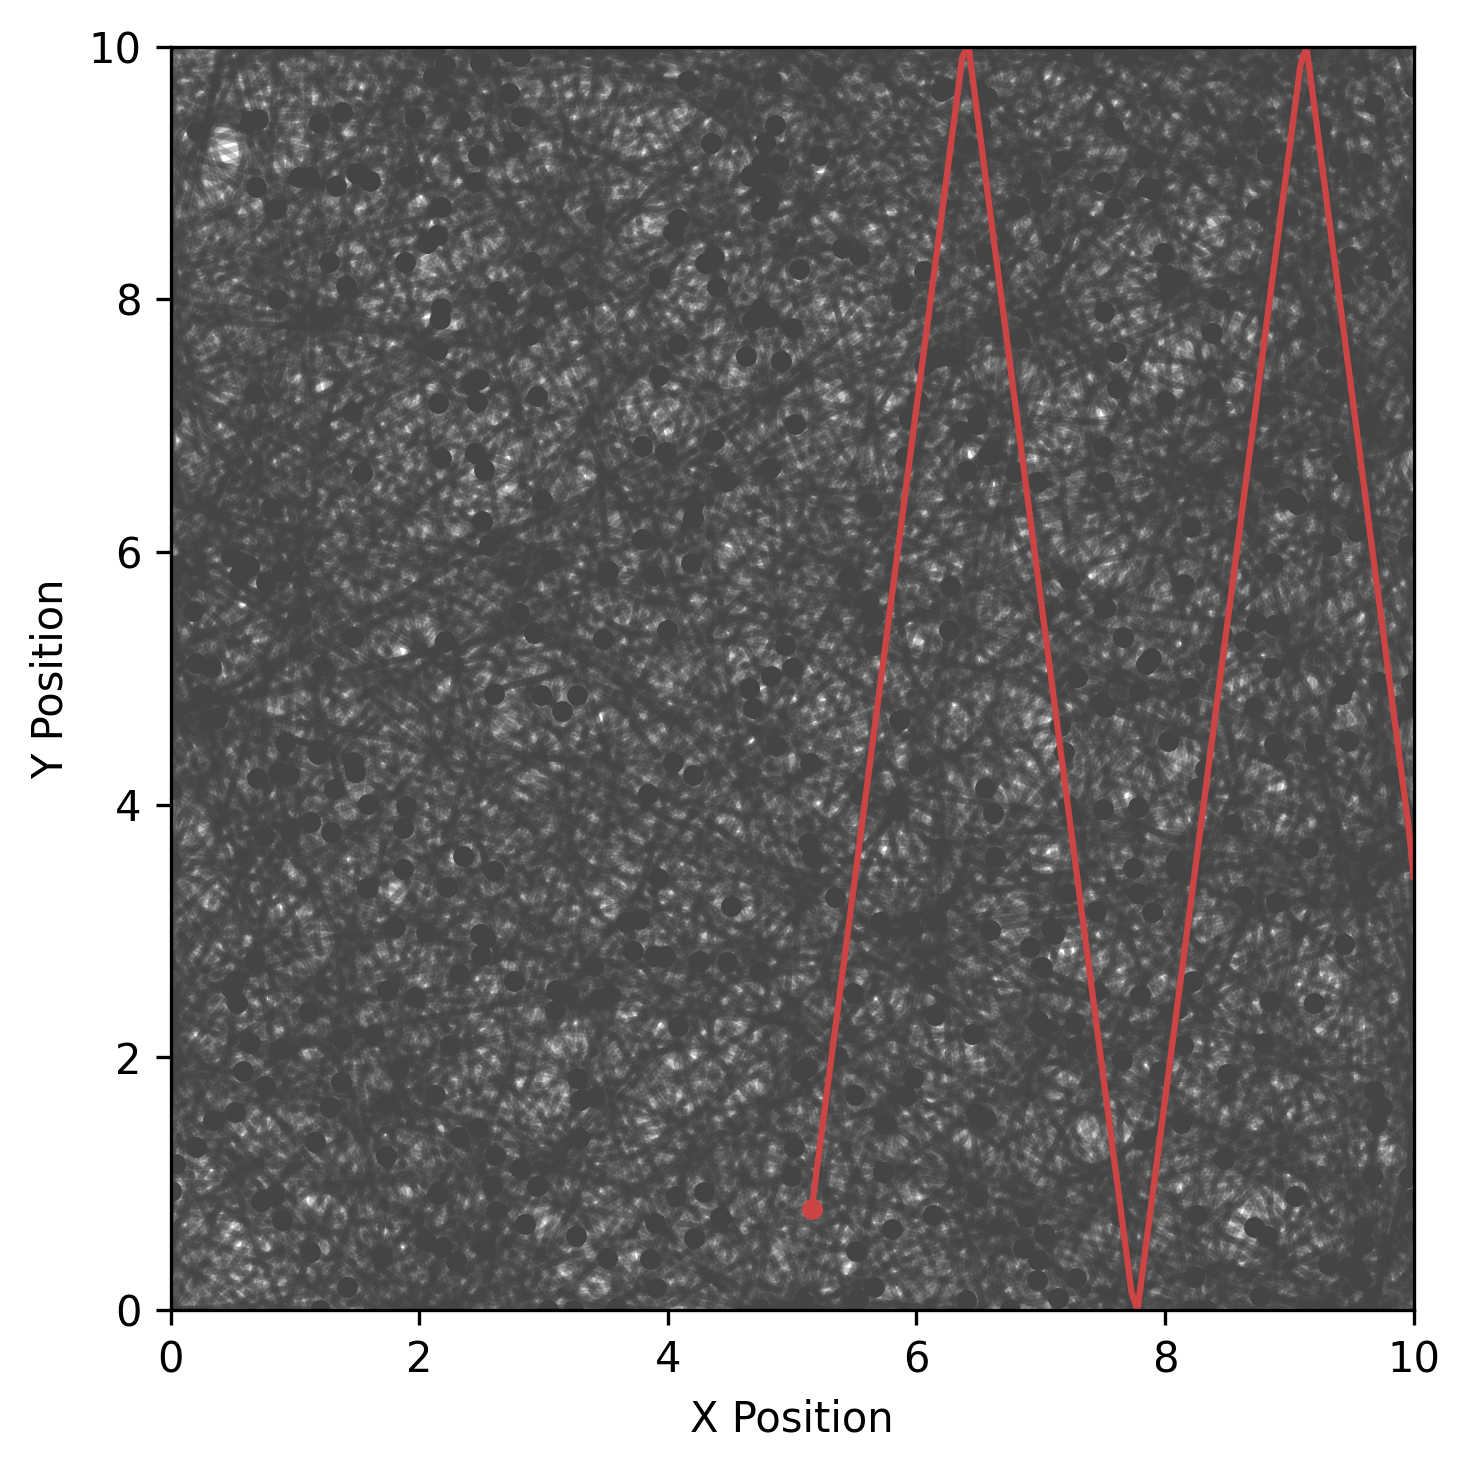

In [28]:
## Plot a reduced representation of the simulation for visual clarity

num_particles_to_plot = 500
time_steps_to_plot = 101
# Convert positions_over_time to a numpy array (time_steps, num_particles, 2)
trajectories = np.array(coordinates)

fig, ax = plt.subplots(figsize=(5,5), dpi=300)

# Plot the next n particles in gray
for i in range(num_particles_to_plot):
    color = '#cc4444' if i == num_particles_to_plot-1 else '#444444'
    alpha = 1.0 if i == num_particles_to_plot-1 else 0.3
    zorder = 10000 if i == num_particles_to_plot-1 else 1
    ax.scatter([trajectories[i, 0, 0]], [trajectories[i, 0, 1]],
               color=color, s=16, zorder=zorder)
    ax.plot(trajectories[i, :time_steps_to_plot, 0],
            trajectories[i, :time_steps_to_plot, 1],
            color=color, alpha=alpha)

# Plot the first particle in red
#ax.plot(trajectories[0, :, 0], trajectories[0, :, 1], color='#cc4444')

# Set limits and labels
ax.set_xlim(0, box_size[0])
ax.set_ylim(0, box_size[1])
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
fig.tight_layout()

In [43]:
## Produce a delta distance (velocity) plot for the first time point

trajectories = np.array(coordinates)
delta_traj = trajectories[:,1,:] - trajectories[:,0,:]
dx, dy = np.reshape(delta_traj, (-1,2)).T # Reshape and split into delta by particle

fig = plt.figure(figsize=(8,4))
import matplotlib.pyplot as plt


# Create a figure with specified size
fig = plt.figure(figsize=(8, 4), dpi=300)
ax = []
# Create a GridSpec with 2 rows and 2 columns
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[2, 2], figure=fig)
# Create the first subplot (4x4 square)
ax.append(fig.add_subplot(gs[:, 0]))  # This spans all rows of the first column
# Create the second subplot (4x2 rectangle at the top right)
ax.append(fig.add_subplot(gs[0, 1]))  # This occupies the first row of the second column
# Create the third subplot (4x2 rectangle at the bottom right)
ax.append(fig.add_subplot(gs[1, 1]))  # This occupies the second row of the second column

# Add scatter plot for dx vs dy
ax[0].scatter(dx, dy, color='#444444', alpha=0.3, s=16)

# Add histograms for separate dx and dy distributions
ax[1].hist(dx, bins=25, color='#444444')
ax[2].hist(dy, bins=25, color='#444444')

# Set limits and labels
bounds = (-1,1)
ax[0].set(xlim=bounds, ylim=bounds)
ax[1].set(xlim=bounds)
ax[2].set(xlim=bounds)
ax[0].set_xlabel(r'$\Delta X$')
ax[1].set_xlabel(r'$\Delta X$')
ax[2].set_xlabel(r'$\Delta Y$')
ax[0].set_ylabel(r'$\Delta Y$')
for i in range(1,3):
  ax[i].set_ylabel('Density')
  ax[i].set_yticks([])

fig.tight_layout()


<Figure size 800x400 with 0 Axes>

To illustrate the construction of k-dimensional Chi distributions, let's sample a large number of particles across 1, 2, or 3 dimensional spaces and compare their SPEEDS (magnitudes of velocities)

In [56]:
## Fixed Simulation parameters
size_per_dim = 10
n_particles = 10000
velocity_scalar = 25.0
simulation_time = 1.0
dt = 0.01 # 1e-4 of the run time

# Compute simulation per dim size
dim_sizes = list(range(1,4))
delta_speed_by_dim_size = {}
for ds in dim_sizes:
    size = [size_per_dim]*ds
    sim = Particle_Simulator(size=size,
                             n_particles=n_particles,
                             velocity_scalar=velocity_scalar)
    times, coordinates, temperatures, pressures = sim.simulate(simulation_time, dt=dt)

    trajectories = np.array(coordinates)
    delta_traj = trajectories[:,1,:] - trajectories[:,0,:]
    delta_speeds = np.sqrt(np.sum(delta_traj**2, axis=-1))
    delta_speed_by_dim_size[ds] = delta_speeds


Simulation complete!
Simulation complete!
Simulation complete!


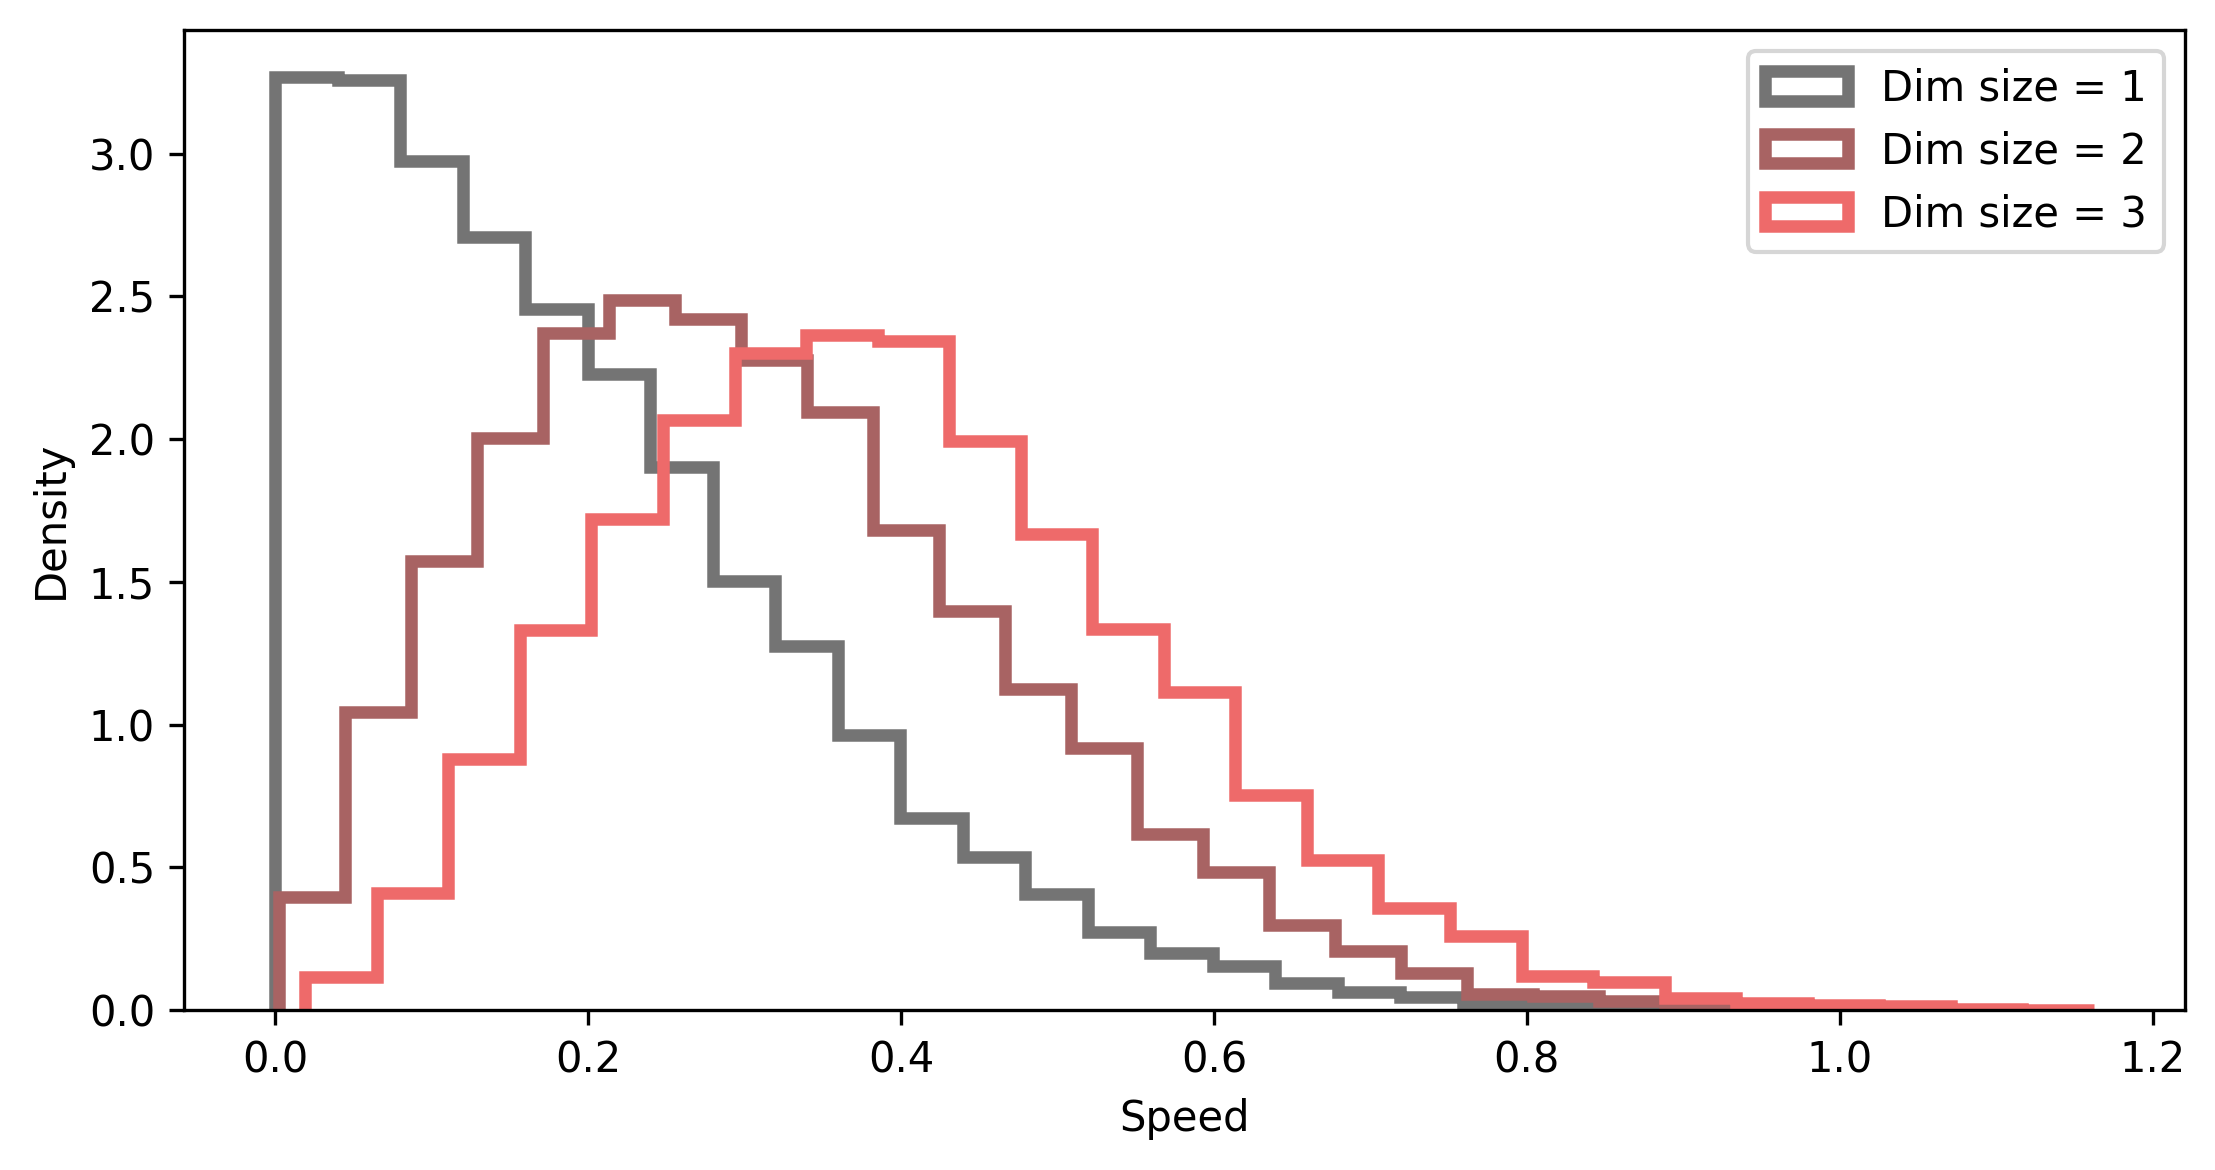

In [69]:
## Plot the results from each dimension size

fig, ax = plt.subplots(figsize=(7.5,4), dpi=300)

colors = ['#747474', '#a86363', '#ee6a6a']

for i, dim_i in enumerate(delta_speed_by_dim_size):
    speeds = delta_speed_by_dim_size[dim_i]
    #ax.hist(speeds, bins=20, color=colors[i], density=True, alpha=0.2)
    ax.hist(speeds, bins=25, color=colors[i], density=True,
            histtype='step', linewidth=3, label=f"Dim size = {dim_i}")
ax.legend()
ax.set_xlabel('Speed')
ax.set_ylabel('Density')


fig.tight_layout()

Repeat single simulation to show behavior of macroscopic properties over time

In [70]:
## Simulation parameters
box_size = [10, 10]
n_particles = 500
velocity_scalar = 25.0
simulation_time = 10.0
dt = 0.01 # 1e-4 of the run time

sim = Particle_Simulator(size=box_size,
                         n_particles=n_particles,
                         velocity_scalar=velocity_scalar)

times, coordinates, temperatures, pressures = sim.simulate(simulation_time, dt=dt)


Simulation complete!


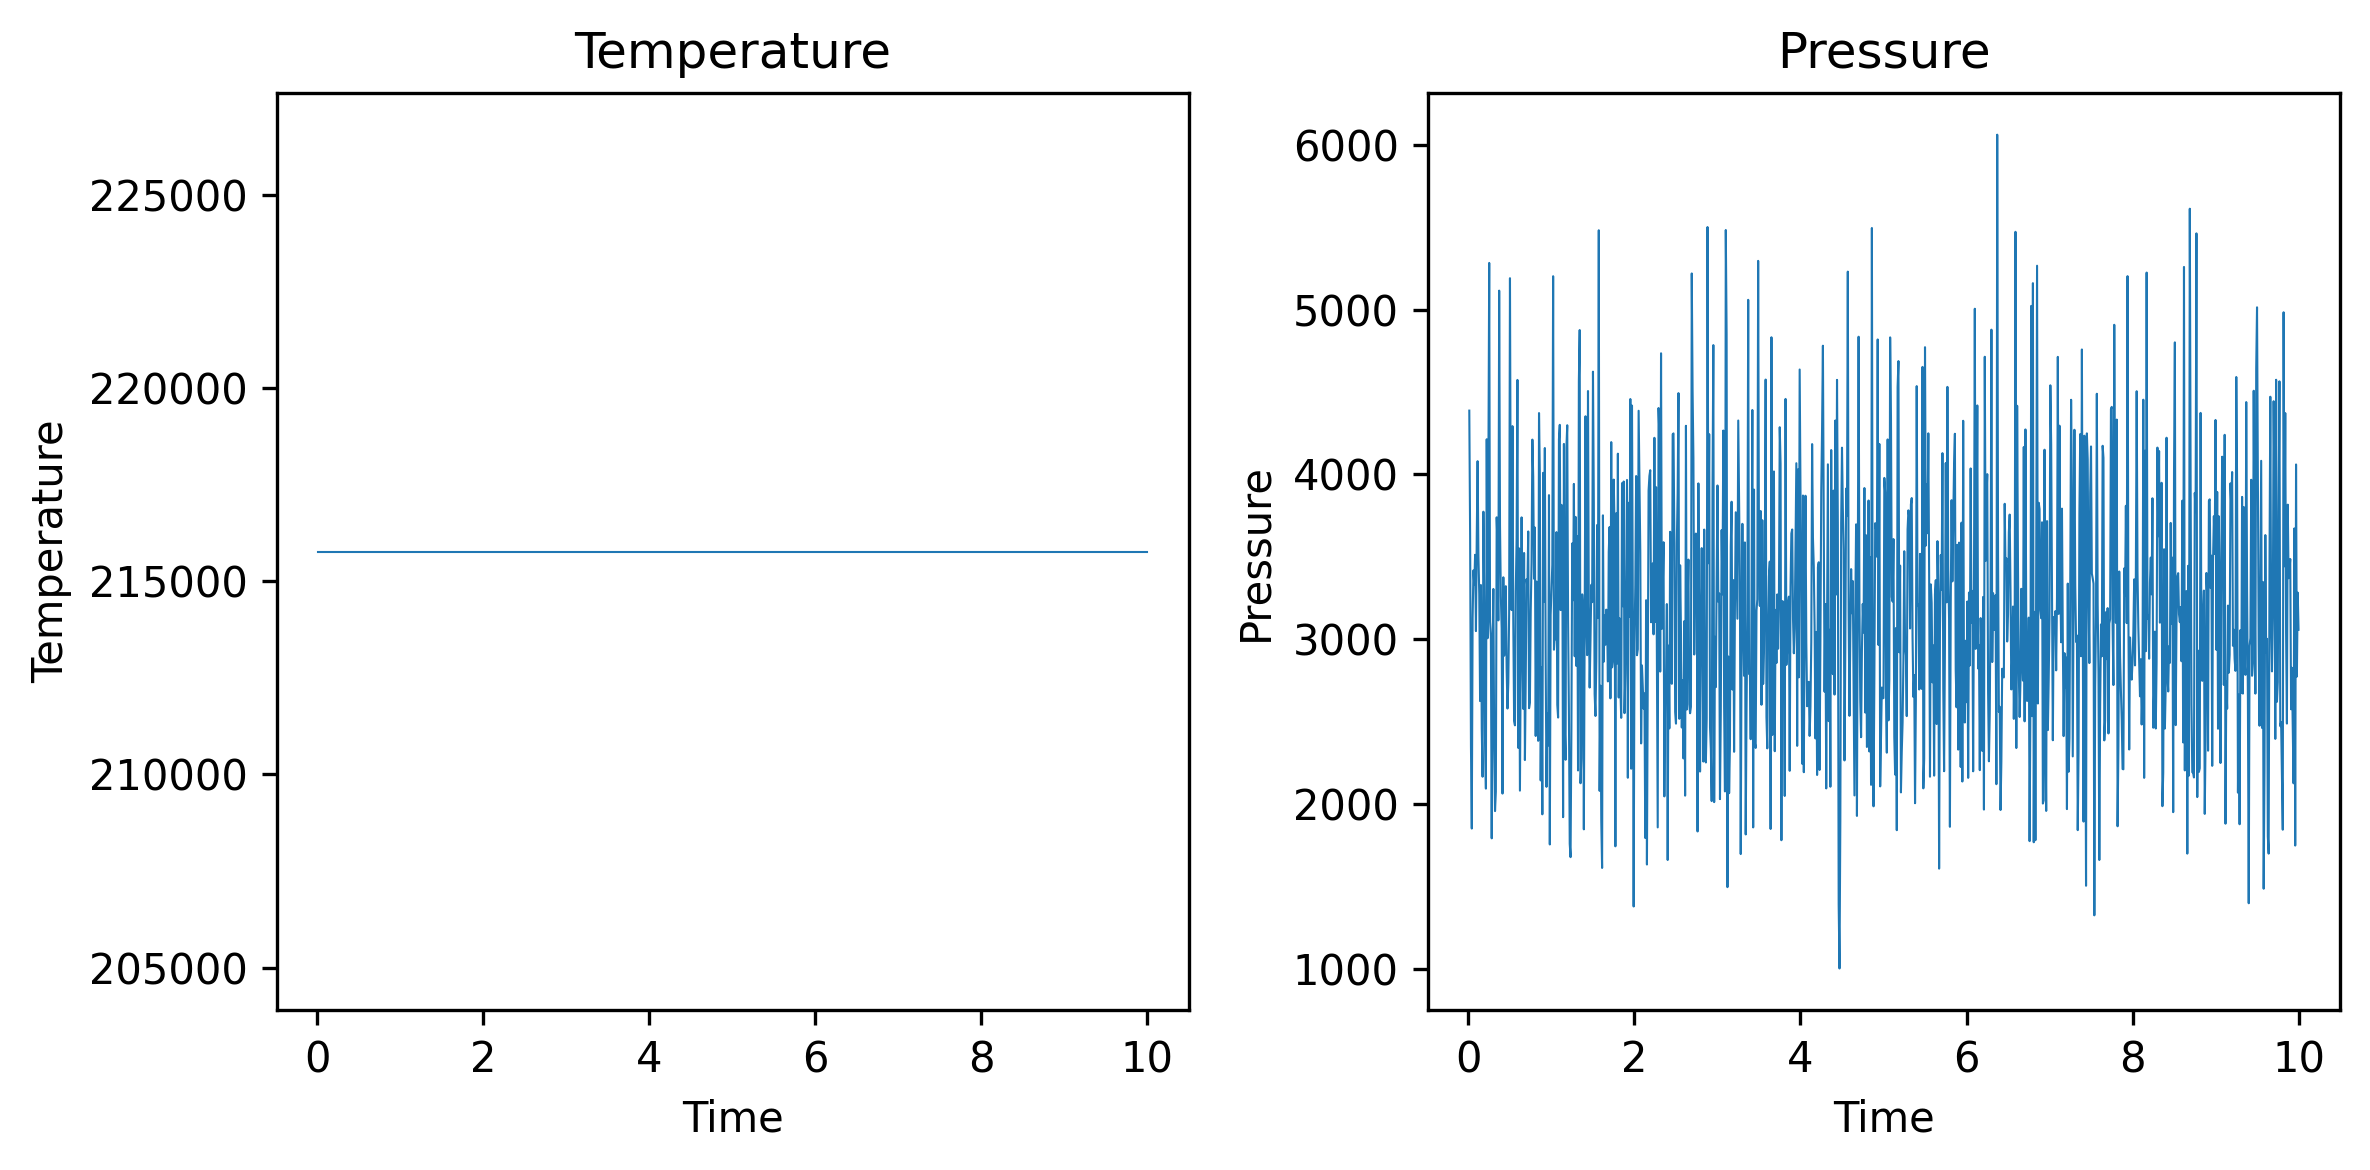

In [72]:
## Plot temperature and pressure over time

fig, ax = plt.subplots(figsize=(8,4), dpi=300, ncols=2)

# Add plots
ax[0].plot(times, temperatures, linewidth=0.5)
ax[1].plot(times, pressures, linewidth=0.5)

# Add labels
labels = ['Temperature', 'Pressure']
for i in range(2):
  ax[i].set_title(labels[i])
  ax[i].set_ylabel(labels[i])
  ax[i].set_xlabel('Time')

fig.tight_layout()


Mean pressure = 3175.74
Std pressure = 800.69


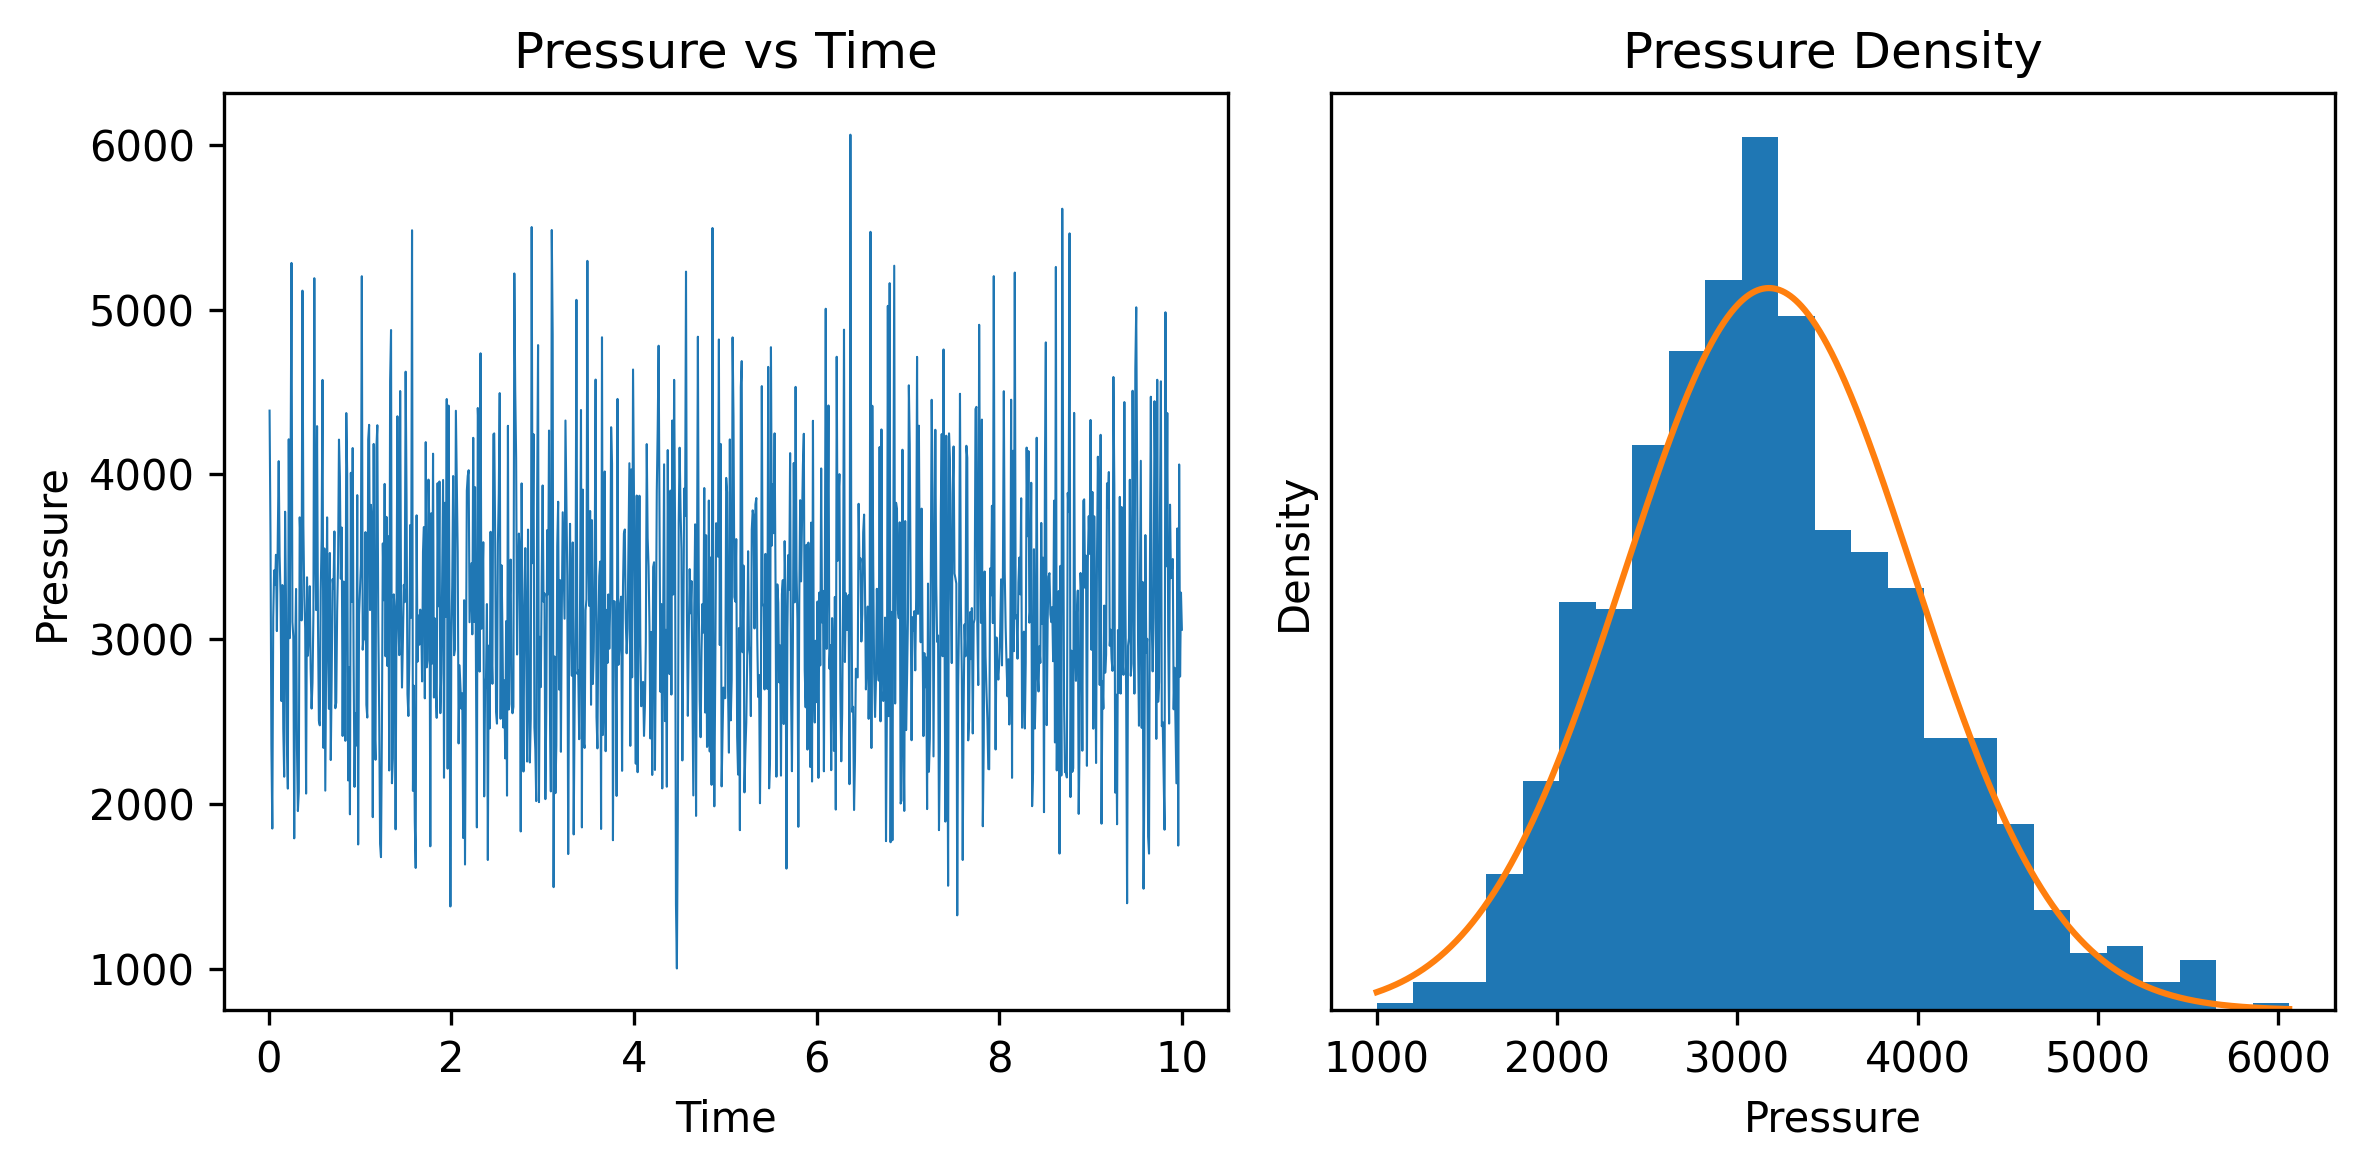

In [76]:
## Repeat the plot, but change temperature to a histogram of the pressures

fig, ax = plt.subplots(figsize=(8,4), dpi=300, ncols=2)

# Add plots
ax[1].hist(pressures, bins=25, density=True)
ax[0].plot(times, pressures, linewidth=0.5)

# Add gaussian fit to histogram
mean_p = np.mean(pressures)
std_p = np.std(pressures, ddof=1) # Need to set ddof=1 to account for delta degrees of freedom
print(f"Mean pressure = {mean_p:.2f}\nStd pressure = {std_p:.2f}")
p_range = (np.min(pressures), np.max(pressures))
p_x = np.linspace(*p_range, 1000) # Create 1000 points in between min and max pressures
p_y = stats.norm.pdf(p_x, mean_p, std_p)
ax[1].plot(p_x, p_y)

# Add labels
ax[1].set_title('Pressure Density')
ax[1].set_ylabel('Density')
ax[1].set_yticks([])
ax[1].set_xlabel('Pressure')
ax[0].set_title('Pressure vs Time')
ax[0].set_ylabel('Pressure')
ax[0].set_xlabel('Time')

fig.tight_layout()


Compare the effects of changing velocity on both temperature and pressure

In [77]:
## Fixed Simulation parameters
size = [10, 10]
n_particles = 500
simulation_time = 10.0
dt = 0.01 # 1e-4 of the run time

# Compute simulation across different velocities
velocity_scalars = [1.0, 2.0, 5.0, 10.0, 15.0, 25.0, 40.0, 60.0, 80.0, 100.0, 200.0]
temp_mean = []
temp_std = []
pres_mean = []
pres_std = []
for velocity_scalar in velocity_scalars:
    sim = Particle_Simulator(size=size,
                             n_particles=n_particles,
                             velocity_scalar=velocity_scalar)
    times, coordinates, temperatures, pressures = sim.simulate(simulation_time, dt=dt)

    temp_mean.append(np.mean(temperatures))
    temp_std.append(np.std(temperatures, ddof=1))
    pres_mean.append(np.mean(pressures))
    pres_std.append(np.std(pressures, ddof=1))


Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!


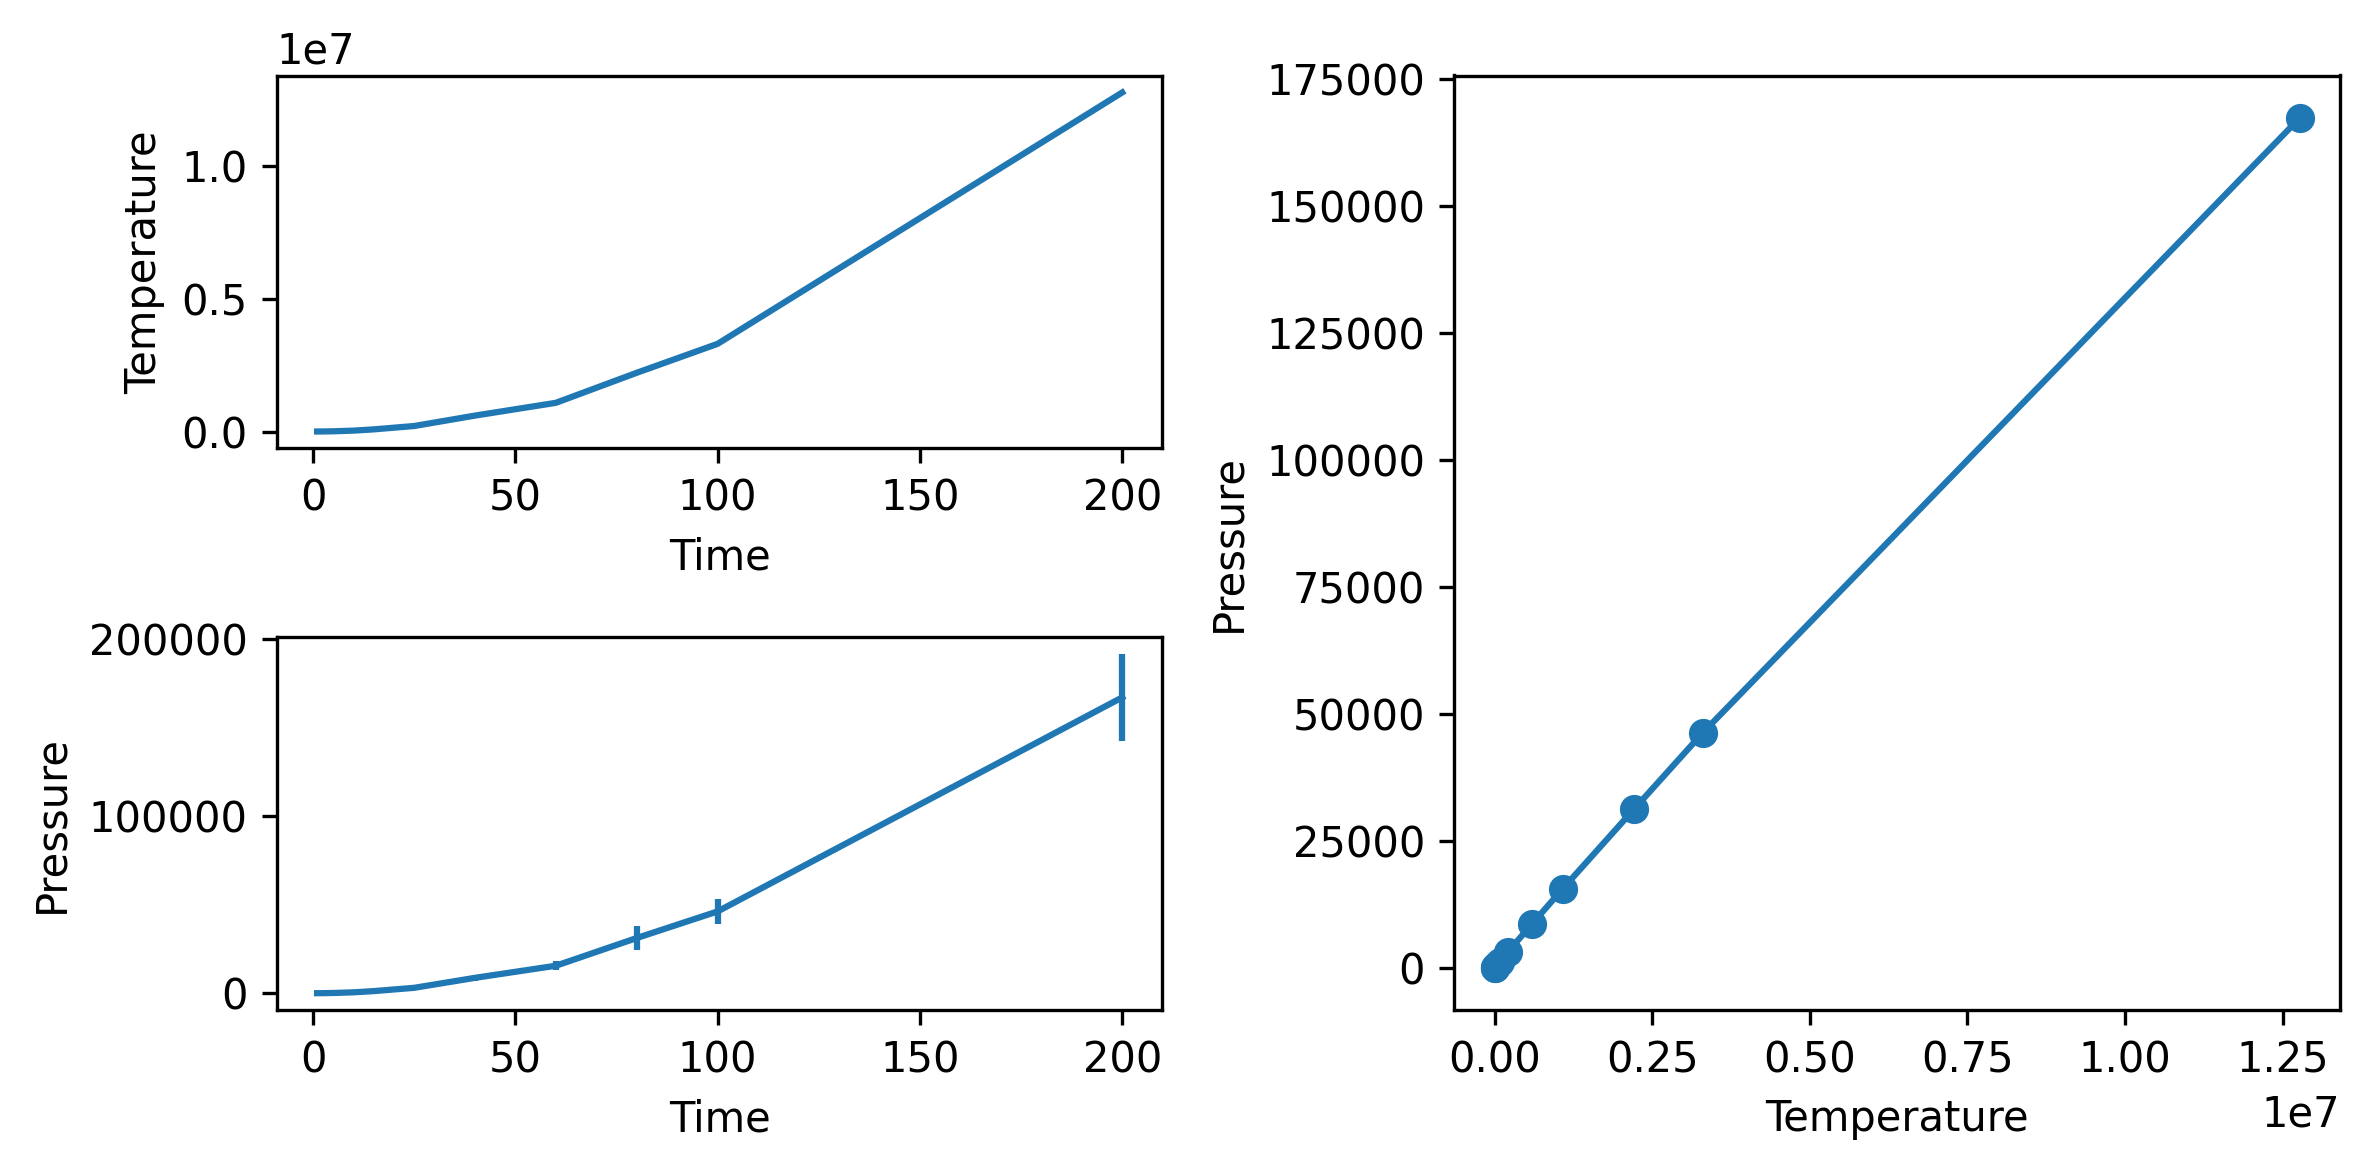

In [89]:
## Plot effect of velocity on both temperature and pressure


# Create a figure with specified size
fig = plt.figure(figsize=(8, 4), dpi=300)
ax = []
# Create a GridSpec with 2 rows and 2 columns
gs = gridspec.GridSpec(2, 4, figure=fig)
ax.append(fig.add_subplot(gs[0, :2]))
ax.append(fig.add_subplot(gs[1, :2]))
ax.append(fig.add_subplot(gs[:, 2:]))

ax[0].errorbar(velocity_scalars, temp_mean, yerr=temp_std)
ax[1].errorbar(velocity_scalars, pres_mean, yerr=pres_std)
ax[2].scatter(temp_mean, pres_mean)
ax[2].plot(temp_mean, pres_mean)

# Add labels
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('Temperature')
ax[1].set_ylabel('Pressure')
ax[2].set_xlabel('Temperature')
ax[2].set_ylabel('Pressure')

fig.tight_layout()

Compare the effects of changing area/volume on pressure

In [97]:
## Fixed Simulation parameters
base_size = [10, 10, 10]
n_particles = 500
simulation_time = 10.0
velocity_scalar = 25.0
dt = 0.01 # 1e-4 of the run time

# Compute simulation across different velocities
size_scalars = list(np.arange(1.0, 11.0))
temp_mean = []
temp_std = []
pres_mean = []
pres_std = []
for size_scalar in size_scalars:
    size = np.array(base_size) * np.power(size_scalar, 1/3)
    sim = Particle_Simulator(size=size,
                             n_particles=n_particles,
                             velocity_scalar=velocity_scalar)
    times, coordinates, temperatures, pressures = sim.simulate(simulation_time, dt=dt)

    temp_mean.append(np.mean(temperatures))
    temp_std.append(np.std(temperatures, ddof=1))
    pres_mean.append(np.mean(pressures))
    pres_std.append(np.std(pressures, ddof=1))


Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!


In [98]:
## Plot effect of volume on pressure


# Create a figure with specified size
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
ax.errorbar(size_scalars, pres_mean, yerr=pres_std)

# Add labels
ax.set_xlabel('Relative Volume')
ax.set_ylabel('Pressure')

fig.tight_layout()

In [100]:
adjusted_sizes = np.array([np.array(base_size) * np.power(size_scalar, 1/3) for size_scalar in size_scalars])

In [111]:
pd.DataFrame({'Volume Scaler':size_scalars, 'Mean Pressure':np.array(pres_mean), 'Product': size_scalars*np.array(pres_mean)})

Volume Scaler  Mean Pressure     Product
0            1.0     307.390675  307.390675
1            2.0     156.063570  312.127140
2            3.0      99.365924  298.097771
3            4.0      77.773714  311.094855
4            5.0      63.558965  317.794825
5            6.0      54.937802  329.626814
6            7.0      44.290272  310.031904
7            8.0      39.439402  315.515214
8            9.0      33.459102  301.131921
9           10.0      33.441283  334.412833

Repeat changing the # of particles

In [112]:
## Fixed Simulation parameters
size = [10, 10]
velocity_scalar = 25.0
simulation_time = 10.0
dt = 0.01 # 1e-4 of the run time

# Compute simulation across different velocities
particle_sizes = list(range(100,2000,100))
temp_mean = []
temp_std = []
pres_mean = []
pres_std = []
for n_particles in particle_sizes:
    sim = Particle_Simulator(size=size,
                             n_particles=n_particles,
                             velocity_scalar=velocity_scalar)
    times, coordinates, temperatures, pressures = sim.simulate(simulation_time, dt=dt)

    temp_mean.append(np.mean(temperatures))
    temp_std.append(np.std(temperatures, ddof=1))
    pres_mean.append(np.mean(pressures))
    pres_std.append(np.std(pressures, ddof=1))


Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!


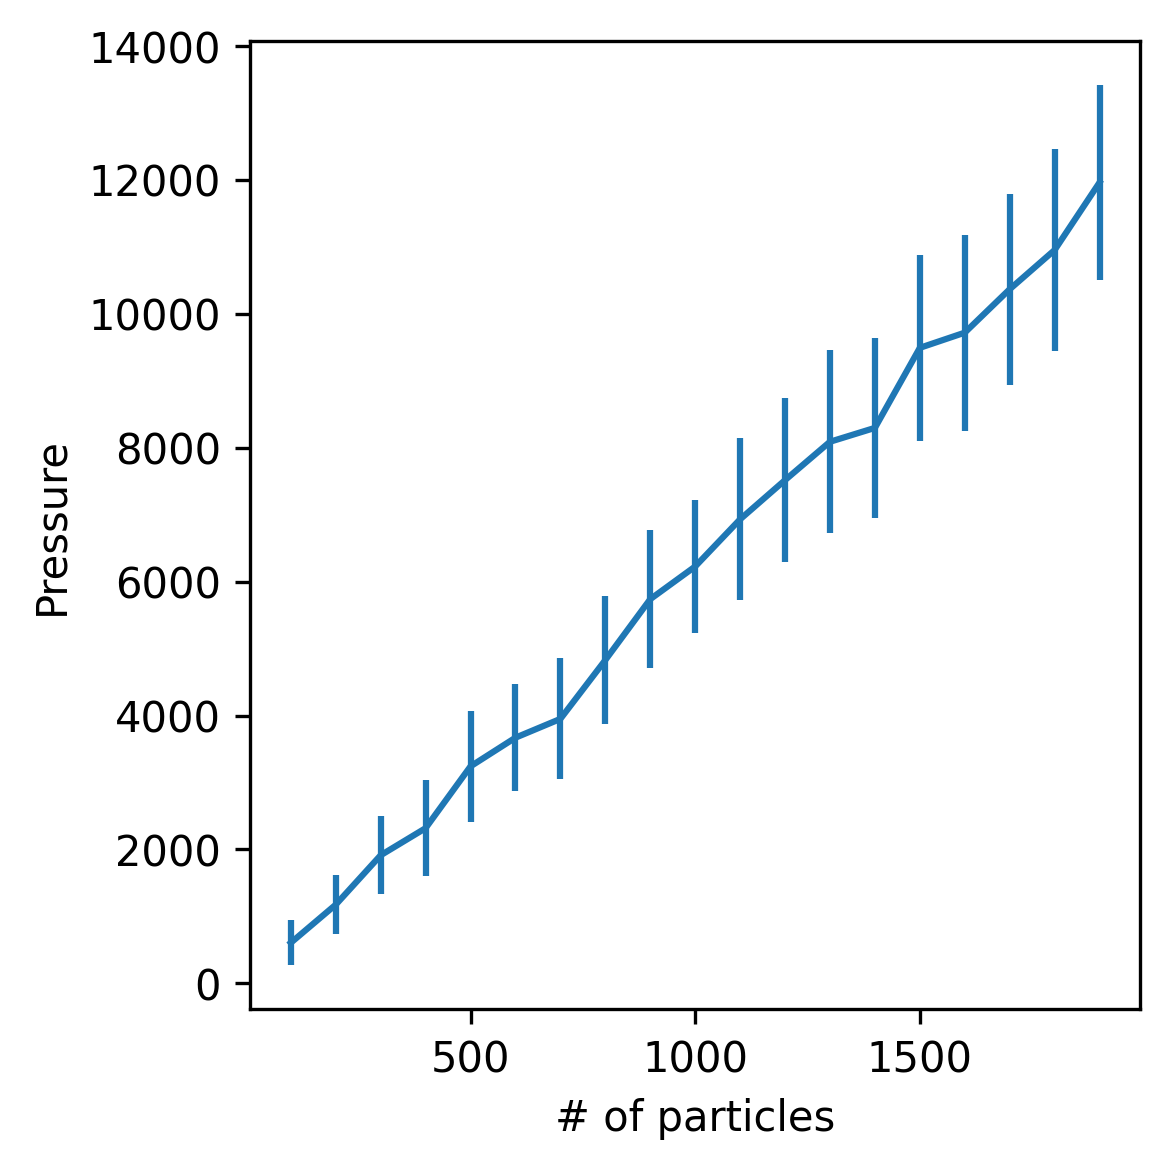

In [113]:
## Plot effect of volume on pressure


# Create a figure with specified size
fig, ax = plt.subplots(figsize=(4, 4), dpi=300)
ax.errorbar(particle_sizes, pres_mean, yerr=pres_std)

# Add labels
ax.set_xlabel('# of particles')
ax.set_ylabel('Pressure')

fig.tight_layout()